In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
ls

Create nice plot of results.ipynb  benchmarking.py
DCA on Lukassen.ipynb              helper.py
DCA on Rosenberg.ipynb             l6_r3_spinal_cord_neurons.loom
DCA on Zeisel.ipynb                scVI on Lukassen.ipynb
DCA_Lukassen_results.csv           scVI on Rosenberg.ipynb
DCA_Rosenberg_results.csv          scVI on Zeisel.ipynb
DCA_Zeisel_results.csv             scVI.py
GSE104556/                         scVI_Lukassen_results.csv
GSE110823/                         scVI_Rosenberg_results.csv
Post.gdoc                          scVI_Zeisel_results.csv
Subsample Rosenberg.ipynb          untitled.txt
__pycache__/


In [46]:
r_dca = pd.read_csv('DCA_Rosenberg_results.csv', index_col=0)
r_dca['simple_cluster'] = r_dca.cluster_assignment.str.split(' ').str.get(1)

r_scvi = pd.read_csv('scVI_Rosenberg_results.csv', index_col=0)
r_scvi['simple_cluster'] = r_scvi.cluster_assignment.str.split(' ').str.get(1)

z_dca = pd.read_csv('DCA_Zeisel_results.csv', index_col=0)

z_scvi = pd.read_csv('scVI_Zeisel_results.csv', index_col=0)

l_dca = pd.read_csv('DCA_Lukassen_results.csv', index_col=0)
l_scvi = pd.read_csv('scVI_Lukassen_results.csv', index_col=0)

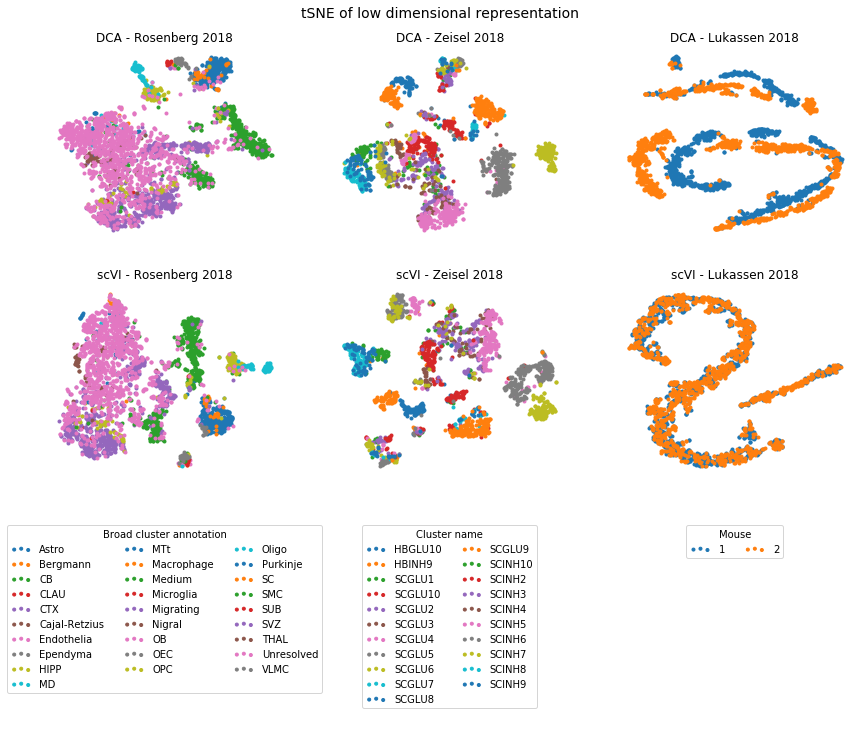

In [81]:
figsize(12, 10)

# Rosenberg

plt.subplot(3, 3, 1)

for n, g in r_dca.groupby('simple_cluster'):
    plt.scatter(g.TSNE_1, g.TSNE_2, label=n, marker='.')
    
plt.title('DCA - Rosenberg 2018')
plt.axis('off')
    
plt.subplot(3, 3, 4)

for n, g in r_scvi.groupby('simple_cluster'):
    plt.scatter(g.TSNE_1, g.TSNE_2, label=n, marker='.')
    
plt.title('scVI - Rosenberg 2018')
plt.axis('off')
    
ax1 = plt.gca()

plt.subplot(3, 3, 7)

h, l = ax1.get_legend_handles_labels()
plt.legend(h, l, ncol=3, loc='upper center', title='Broad cluster annotation', scatterpoints=3)
plt.axis('off')

# Zeisel

plt.subplot(3, 3, 2)

for n, g in z_dca.groupby('ClusterName'):
    plt.scatter(g.TSNE_1, g.TSNE_2, label=n, marker='.')

plt.title('DCA - Zeisel 2018')
plt.axis('off')

plt.subplot(3, 3, 5)

for n, g in z_scvi.groupby('ClusterName'):
    plt.scatter(g.TSNE_1, g.TSNE_2, label=n, marker='.')

plt.title('scVI - Zeisel 2018')
plt.axis('off')

ax1 = plt.gca()

plt.subplot(3, 3, 8)

h, l = ax1.get_legend_handles_labels()
plt.legend(h, l, ncol=2, loc='upper center', title='Cluster name', scatterpoints=3)
plt.axis('off')

plt.subplot(3, 3, 3)

for n, g in l_dca.groupby('batch'):
    plt.scatter(g.TSNE_1, g.TSNE_2, label=n, marker='.')
    
plt.title('DCA - Lukassen 2018')
plt.axis('off')
    
plt.subplot(3, 3, 6)

for n, g in l_scvi.groupby('batch'):
    plt.scatter(g.TSNE_1, g.TSNE_2, label=n, marker='.')
    
plt.title('scVI - Lukassen 2018')
plt.axis('off')
    
ax1 = plt.gca()

plt.subplot(3, 3, 9)

h, l = ax1.get_legend_handles_labels()
plt.legend(h, l, ncol=3, loc='upper center', title='Mouse', scatterpoints=3)
plt.axis('off')

plt.suptitle('tSNE of low dimensional representation', y=1.02, fontsize=14)

plt.tight_layout()
plt.savefig('results.png', dpi=150, bbox_inches='tight')